# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'traffic-signs-data/train.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

In [2]:
import csv
import pprint 

sign_dict = {}; 
with open('signnames.csv', 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        try:
            sign_dict.update({int(row[0]): row[1]})
        except ValueError:
            print("Could not convert data to an integer.")            

pp = pprint.PrettyPrinter()
pp.pprint(sign_dict)

Could not convert data to an integer.
{0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 2: 'Speed limit (50km/h)',
 3: 'Speed limit (60km/h)',
 4: 'Speed limit (70km/h)',
 5: 'Speed limit (80km/h)',
 6: 'End of speed limit (80km/h)',
 7: 'Speed limit (100km/h)',
 8: 'Speed limit (120km/h)',
 9: 'No passing',
 10: 'No passing for vehicles over 3.5 metric tons',
 11: 'Right-of-way at the next intersection',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vehicles',
 16: 'Vehicles over 3.5 metric tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve to the left',
 20: 'Dangerous curve to the right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End of all speed and passing limits',
 33: 'Turn right ahead',
 34: 'Turn left 

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [3]:
### Replace each question mark with the appropriate value.
import numpy

# Number of training examples
n_train = len(X_train)

# Number of testing examples.
n_test = len(X_test)

# What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# How many unique classes/labels there are in the dataset.
n_classes = len(numpy.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

assert(len(X_train) == len(y_train))
assert(len(X_test) == len(y_test))

print()
print("Image Shape: {}".format(X_train[0].shape))
print()
print("Training Set:   {} samples".format(len(X_train)))
print("Test Set:       {} samples".format(len(X_test)))

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43

Image Shape: (32, 32, 3)

Training Set:   39209 samples
Test Set:       12630 samples


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

This is class 13: Yield


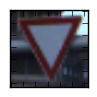

This is class 0: Speed limit (20km/h)


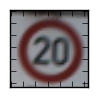

This is class 36: Go straight or right


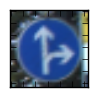

In [4]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import random
import numpy as np
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.

%matplotlib inline

for i in range(0,3):
    index = random.randint(0, len(X_train))
    image = X_train[index].squeeze()

    plt.figure(figsize=(1,1))
    plt.imshow(image)
    plt.tick_params(
        axis='x',          # changes apply to the x-axis
        labelbottom='off') # labels along the bottom edge are off
    plt.tick_params(
        axis='y',          # changes apply to the x-axis
        labelleft='off')   # labels along the bottom edge are off
    print("This is class " + str(y_train[index]) + ": " + sign_dict[y_train[index]])
    plt.show()

class 0 (Speed limit (20km/h)) has 210 samples


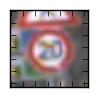

class 1 (Speed limit (30km/h)) has 2220 samples


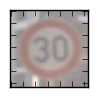

class 2 (Speed limit (50km/h)) has 2250 samples


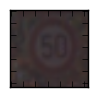

class 3 (Speed limit (60km/h)) has 1410 samples


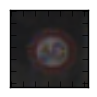

class 4 (Speed limit (70km/h)) has 1980 samples


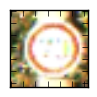

class 5 (Speed limit (80km/h)) has 1860 samples


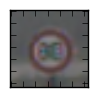

class 6 (End of speed limit (80km/h)) has 420 samples


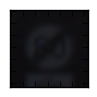

class 7 (Speed limit (100km/h)) has 1440 samples


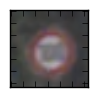

class 8 (Speed limit (120km/h)) has 1410 samples


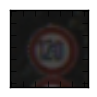

class 9 (No passing) has 1470 samples


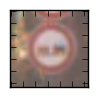

class 10 (No passing for vehicles over 3.5 metric tons) has 2010 samples


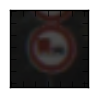

class 11 (Right-of-way at the next intersection) has 1320 samples


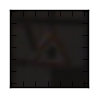

class 12 (Priority road) has 2100 samples


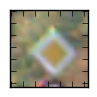

class 13 (Yield) has 2160 samples


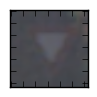

class 14 (Stop) has 780 samples


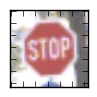

class 15 (No vehicles) has 630 samples


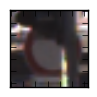

class 16 (Vehicles over 3.5 metric tons prohibited) has 420 samples


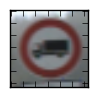

class 17 (No entry) has 1110 samples


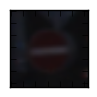

class 18 (General caution) has 1200 samples


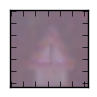

class 19 (Dangerous curve to the left) has 210 samples


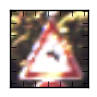

class 20 (Dangerous curve to the right) has 360 samples


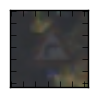

class 21 (Double curve) has 330 samples


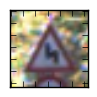

class 22 (Bumpy road) has 390 samples


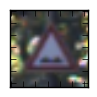

class 23 (Slippery road) has 510 samples


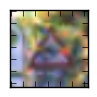

class 24 (Road narrows on the right) has 270 samples


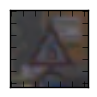

class 25 (Road work) has 1500 samples


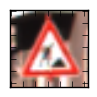

class 26 (Traffic signals) has 600 samples


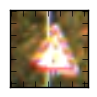

class 27 (Pedestrians) has 240 samples


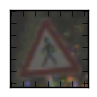

class 28 (Children crossing) has 540 samples


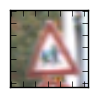

class 29 (Bicycles crossing) has 270 samples


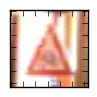

class 30 (Beware of ice/snow) has 450 samples


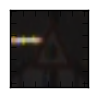

class 31 (Wild animals crossing) has 780 samples


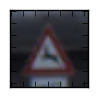

class 32 (End of all speed and passing limits) has 240 samples


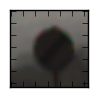

class 33 (Turn right ahead) has 689 samples


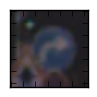

class 34 (Turn left ahead) has 420 samples


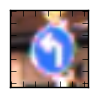

class 35 (Ahead only) has 1200 samples


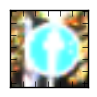

class 36 (Go straight or right) has 390 samples


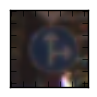

class 37 (Go straight or left) has 210 samples


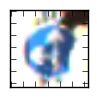

class 38 (Keep right) has 2070 samples


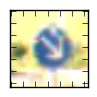

class 39 (Keep left) has 300 samples


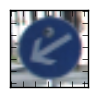

class 40 (Roundabout mandatory) has 360 samples


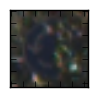

class 41 (End of no passing) has 240 samples


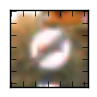

class 42 (End of no passing by vehicles over 3.5 metric tons) has 240 samples


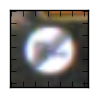

In [5]:
u, indices = np.unique(y_train, return_index=True)
for i in range(0,len(u)):
    num = np.sum(y_train == i);
    print("class {} ({}) has {} samples".format(i,sign_dict[i],num))
    image = X_train[indices[i]].squeeze()
    plt.figure(figsize=(1,1))
    plt.tick_params(axis='x',labelbottom='off')
    plt.tick_params(axis='y',labelleft='off')
    plt.imshow(image)
    plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

### TWE: Define functions

In [6]:
import matplotlib
import scipy.misc
import numpy as np

def plot_image(image, caption):
    # image = X_train[indices[i]].squeeze()
    plt.figure(figsize=(1,1))
    plt.tick_params(axis='x',labelbottom='off')
    plt.tick_params(axis='y',labelleft='off')
    plt.imshow(image)
    plt.title(caption)
    plt.show()

In [7]:
def mod_lighting(img, offset_saturation = -1, offset_lightness = -1):
    #    Farbwert als Farbwinkel H auf dem Farbkreis (etwa 0° für Rot, 120° für Grün, 240° für Blau)
    #    Sättigung S in Prozent (0 % = Neutralgrau, 50 % = wenig gesättigte Farbe, 100 % = gesättigte, reine Farbe) oder in einem Intervall von Null bis Eins
    #    Hellwert V als Prozentsatz (0 % = keine Helligkeit, 100 % = volle Helligkeit), oder in einem Intervall von Null bis Eins, auch Dunkelstufe genannt.
    if offset_saturation == -1:
        offset_saturation = np.random.randn()*0.1;
    if offset_lightness == -1:
        offset_lightness  = np.random.randn()*0.3;
    img = img/255.0;
    img_hsv = matplotlib.colors.rgb_to_hsv(img);
    img_hsv[:,:,1] = np.maximum( np.minimum(img_hsv[:,:,1]+offset_saturation, 1.0), 0.0);
    img_hsv[:,:,2] = np.maximum( np.minimum(img_hsv[:,:,2]+offset_lightness, 1.0), 0.0);
    img_rgb = matplotlib.colors.hsv_to_rgb(img_hsv);
    return img_rgb

def mod_blur(img):
    # requires python package "Pillow"
    blur = np.random.randn()*2;    
    img_blur = scipy.misc.imfilter(X_train[3], 'smooth')
    return img_blur
  
def mod_rotate(img):
    # requires python package "Pillow"
    angle = np.random.randn()*10;
    img_rot = scipy.misc.imrotate(X_train[3], angle)
    return img_rot

def normalize_grayscale(image_data):
    # TODO
    a = 0.1
    b = 0.9
    x_min = np.min(image_data);
    x_max = np.max(image_data);
    image_data_new = a + (image_data-x_min)*(b-a) / (x_max - x_min);
    return image_data_new

def normalize_rgb(image_data):
    raise "Not implemented"


### TWE: Preprocessing and generations of trainig, validation and test set

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

# Get randomized datasets for training and validation
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train,
    y_train,
    test_size=0.05,
    random_state=832289)

# Shuffle training data
X_train, y_train = shuffle(X_train, y_train)

# Generate additional images
N_ADDITIONAL_IMG = 1000

switcher = {
    0: mod_lighting,
    1: mod_blur,
    2: mod_rotate,
}
n_train = len(X_train)

for i in range(0,N_ADDITIONAL_IMG):
    index = random.randint(0, n_train)
    # randomly choose between different image modifiers
    func = switcher.get(random.randint(0,2))
    label_new = y_train[index];
    img_new = func(X_train[index])
    X_train = np.concatenate((X_train, [img_new]), axis=0)
    y_train = np.append(y_train, label_new)
    # plot_image(img_new, "new") # uncomment to see generated images

print()
print("Image Shape: {}".format(X_train[0].shape))
print()
print("Training Set:   {} samples (original samples {})".format(len(X_train), n_train))
print("Validation Set: {} samples".format(len(X_valid)))
print("Test Set:       {} samples".format(len(X_test)))

### TWE: Definition of network architecture

In [ ]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

import tensorflow as tf
from tensorflow.contrib.layers import flatten

# ??????????????????????????????????????
# Convolution
#  SAME:
#    new_height = (input_height - filter_height + 2 * P)/S + 1
#    new_width = (input_width - filter_width + 2 * P)/S + 1
#  VALID:
#    out_height = ceil(float(in_height - filter_height + P*1) / float(S))
#    out_width  = ceil(float(in_width - filter_width + P*1) / float(S))
#
# Max Pool:
#    new_height = (input_height - filter_height)/S + 1
#    new_width = (input_width - filter_width)/S + 1
#
# out_height = ceil(float(in_height - filter_height + 1) / float(strides[1]))
# out_width  = ceil(float(in_width - filter_width + 1) / float(strides[2]))

def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    #    new_height = (32 - 5 + 1)/1 = 28
    #    new_width  = (32 - 5 + 1)/1 = 28
    conv1_weights = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean=mu, stddev=sigma)) # (height, width, input_depth, output_depth)
    conv1_bias    = tf.Variable(tf.zeros(6))
    strides       = [1, 1, 1, 1] # (batch, height, width, depth)
    padding       = 'VALID'
    conv1         = tf.nn.conv2d(x, conv1_weights, strides, padding) + conv1_bias
    #  x = tf.nn.bias_add(x, b)

    # Activation.
    conv1_activation =  tf.nn.relu(conv1)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    ksize         = [1, 2, 2, 1]
    strides       = [1, 2, 2, 1] # (batch_size, height, width, depth)
    padding       = 'VALID'
    conv1_pooling = tf.nn.max_pool(conv1_activation, ksize, strides, padding)

    # Layer 2: Convolutional. Output = 10x10x16.
    #    new_height = (14 - 5 + 2 * 0)/1 + 1 = 10
    #    new_width  = (14 - 5 + 2 * 0)/1 + 1 = 10
    conv2_weights = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean=mu, stddev=sigma)) # (height, width, input_depth, output_depth)
    conv2_bias    = tf.Variable(tf.zeros(16))
    strides       = [1, 1, 1, 1] # (batch, height, width, depth)
    padding       = 'VALID'
    conv2         = tf.nn.conv2d(conv1_pooling, conv2_weights, strides, padding) + conv2_bias   
    
    # Activation.
    conv2_activation = tf.nn.relu(conv2)    

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    #    new_height = (10 - 2)/2 + 1 = 5
    #    new_width  = (10 - 2)/2 + 1 = 5
    ksize         = [1, 2, 2, 1]
    strides       = [1, 2, 2, 1] # (batch_size, height, width, depth)
    padding       = 'VALID'
    conv2_pooling = tf.nn.max_pool(conv2_activation, ksize, strides, padding)        

    # Flatten. Input = 5x5x16. Output = 400.
    fully_connected1 = flatten(conv2_pooling)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_weights = tf.Variable(tf.truncated_normal([400, 120], mean=mu, stddev=sigma))
    fc1_biases  = tf.Variable(tf.zeros(120))
    fully_connected1 = tf.matmul(fully_connected1, fc1_weights) + fc1_biases
    
    # Activation.
    fully_connected1_activation = tf.nn.relu(fully_connected1) 

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_weights = tf.Variable(tf.truncated_normal([120, 84], mean=mu, stddev=sigma))
    fc2_biases  = tf.Variable(tf.zeros(84))
    fully_connected2 = tf.matmul(fully_connected1_activation, fc2_weights) + fc2_biases
    
    # Activation.
    fully_connected2_activation = tf.nn.relu(fully_connected2) 
    
    # Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_weights = tf.Variable(tf.truncated_normal([84, n_classes], mean=mu, stddev=sigma))
    fc3_biases  = tf.Variable(tf.zeros(n_classes))
    fully_connected3 = tf.matmul(fully_connected2_activation, fc3_weights) + fc3_biases    
    
    logits = fully_connected3
    return logits

### TWE: Training

In [ ]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

In [ ]:
LEARING_RATE = 0.001

logits             = LeNet(x)
cross_entropy      = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation     = tf.reduce_mean(cross_entropy)
optimizer          = tf.train.AdamOptimizer(learning_rate = LEARING_RATE)
training_operation = optimizer.minimize(loss_operation)
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [ ]:
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [ ]:
### Train your model here.
### Feel free to use as many code cells as needed.
EPOCHS = 10
BATCH_SIZE = 128*4

saver = tf.train.Saver()

# Measurements use for graphing loss and accuracy
log_batch_step = 50
batches = []
loss_batch = []
train_acc_batch = []
valid_acc_batch = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]

            # Run optimizer and get loss
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
            # Log every 50 batches
            if not i % log_batch_step:
                # Calculate Training and Validation accuracy
                loss_current_batch  = sess.run(loss_operation],feed_dict={x: batch_x, y: batch_y})
                training_accuracy   = sess.run(accuracy_operation, feed_dict={x: X_train, y: y_train})
                validation_accuracy = sess.run(accuracy_operation, feed_dict={x: X_valid, y: y_valid})

                # Log batches
                previous_batch = batches[-1] if batches else 0
                batches.append(log_batch_step + previous_batch)
                loss_batch.append(loss_current_batch)
                train_acc_batch.append(training_accuracy)
                valid_acc_batch.append(validation_accuracy)
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, 'lenet_traffic_sign')
    print("Model saved")

In [ ]:
loss_plot = plt.subplot(211)
loss_plot.set_title('Loss')
loss_plot.plot(batches, loss_batch, 'g')
loss_plot.set_xlim([batches[0], batches[-1]])
acc_plot = plt.subplot(212)
acc_plot.set_title('Accuracy')
acc_plot.plot(batches, train_acc_batch, 'r', label='Training Accuracy')
acc_plot.plot(batches, valid_acc_batch, 'x', label='Validation Accuracy')
acc_plot.set_ylim([0, 1.0])
acc_plot.set_xlim([batches[0], batches[-1]])
acc_plot.legend(loc=4)
plt.tight_layout()
plt.show()

print('Validation accuracy at {}'.format(validation_accuracy))

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

In [ ]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

plot_image(X_train[3]/255.0, "original")
plot_image(mod_lighting( X_train[3] ), "lighting")
plot_image(mod_blur( X_train[3] ), "blur")
plot_image(mod_rotate( X_train[3] ), "rotate")
plot_image(normalize_grayscale( X_train[3] ), "normalize")

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

In [ ]:
with tf.Session() as sess:
    # lenet_traffic_sign
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

In [ ]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In [ ]:
#img_hsv[:,:,2] = np.minimum(img_hsv[:,:,2], np.ones(img_hsv.shape[0:2]));
#img_rgb.view()
#dir(img_rgb)